In [31]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import time

In [3]:
lfw = datasets.fetch_lfw_people(min_faces_per_person = 100, resize = 0.4)

In [4]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [6]:
lfw.data.shape

(1140, 1850)

In [7]:
lfw.images.shape

(1140, 50, 37)

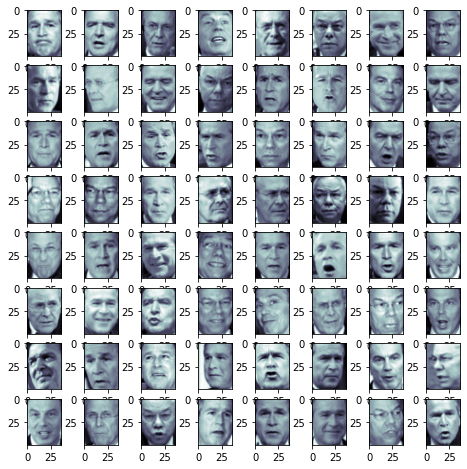

In [10]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(lfw.images[i], cmap = plt.cm.bone)

plt.show()

In [23]:
x, y = lfw.data, lfw.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
pca_oliv = PCA()
pca_oliv.fit(x_train)

PCA()

In [24]:
k = 0
total = 0
while total < 0.99:
    total = total + pca_oliv.explained_variance_ratio_[k]
    k = k + 1
    
k

316

In [25]:
pca_lfw = PCA(n_components= k, whiten= True)
x_transformed = pca_lfw.fit_transform(x_train)
x_transformed.shape

(855, 316)

In [27]:
x_approx = pca_lfw.inverse_transform(x_transformed)
x_approx = x_approx.reshape((855, 50, 37))

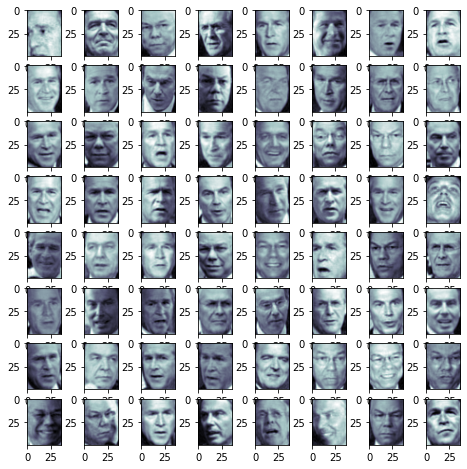

In [28]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(x_approx[i], cmap = plt.cm.bone)

plt.show()

In [29]:
pca_lfw.components_.shape
eigenv = pca_lfw.components_.reshape(k, 50, 37)

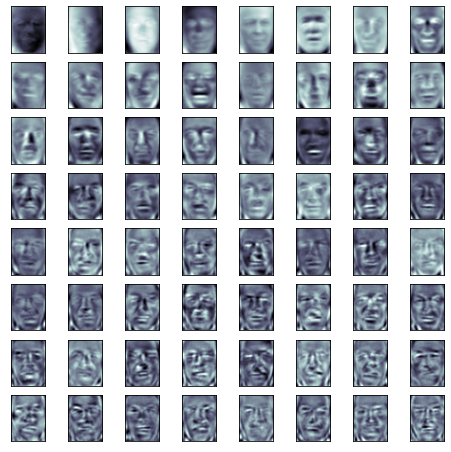

In [30]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(eigenv[i], cmap = plt.cm.bone)

plt.show()

In [34]:
x_train_pca = x_transformed
x_test_pca = pca_lfw.transform(x_test)

In [35]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train, y_train)
print(time.time() - start)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.3794243335723877
              precision    recall  f1-score   support

           0       0.86      0.69      0.76        61
           1       0.91      0.28      0.43        36
           2       0.58      0.99      0.73       122
           3       1.00      0.19      0.32        31
           4       0.91      0.29      0.43        35

    accuracy                           0.66       285
   macro avg       0.85      0.49      0.54       285
weighted avg       0.77      0.66      0.62       285

[[ 42   0  19   0   0]
 [  5  10  21   0   0]
 [  1   0 121   0   0]
 [  0   1  23   6   1]
 [  1   0  24   0  10]]


In [36]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca, y_train)
print(time.time() - start)
y_pred = rf.predict(x_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7639553546905518
              precision    recall  f1-score   support

           0       0.75      0.20      0.31        61
           1       0.00      0.00      0.00        36
           2       0.45      0.99      0.62       122
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        35

    accuracy                           0.47       285
   macro avg       0.24      0.24      0.19       285
weighted avg       0.35      0.47      0.33       285

[[ 12   0  49   0   0]
 [  2   0  34   0   0]
 [  1   0 121   0   0]
 [  1   0  30   0   0]
 [  0   0  35   0   0]]


C:\Users\Aman kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
